In [ ]:
!pip install opencv-python matplotlib numpy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

Saving image TP2 IMN.jpg to image TP2 IMN (2).jpg


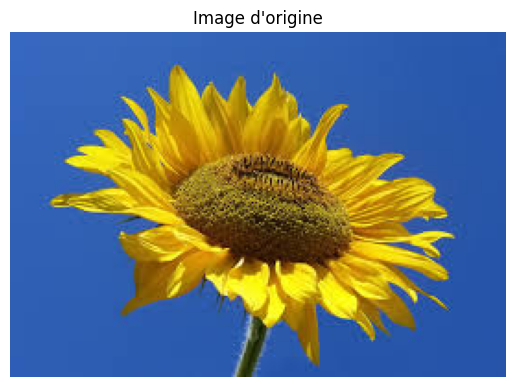

In [ ]:
from google.colab import files

# Importer une image depuis son ordinateur
uploaded = files.upload()

# Lire l'image
image = cv2.imread("image TP2 IMN.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB

# Affichage
plt.imshow(image)
plt.title("Image d'origine")
plt.axis("off")
plt.show()


In [ ]:
# ajoute des pixels noirs et blancs de manière aléatoire.
def add_salt_pepper_noise(image, prob):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = num_salt

    # Ajouter du sel (pixels blancs)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
    noisy[coords[0], coords[1], :] = 255

    # Ajouter du poivre (pixels noirs)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
    noisy[coords[0], coords[1], :] = 0

    return noisy

noisy_sp = add_salt_pepper_noise(image, 0.02)

plt.imshow(noisy_sp)
plt.title("Bruit Poivre et Sel")
plt.axis("off")
plt.show()


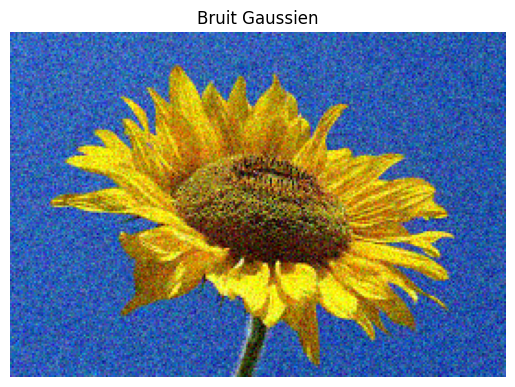

In [ ]:
#ajoute des variations aléatoires selon une distribution gaussienne.
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy, 0, 255).astype(np.uint8)

noisy_gaussian = add_gaussian_noise(image)

plt.imshow(noisy_gaussian)
plt.title("Bruit Gaussien")
plt.axis("off")
plt.show()


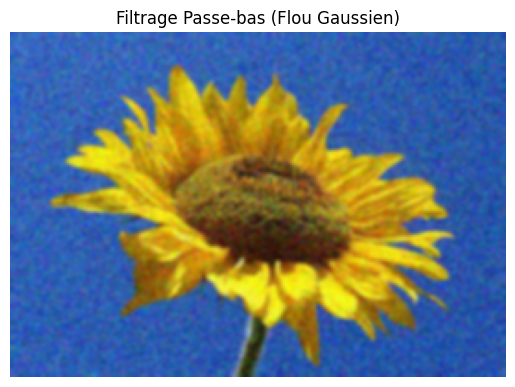

In [ ]:
#Chaque pixel est remplacé par la moyenne des pixels voisins.
#Réduit le bruit et lisse l’image mais peut flouter les contours.
filtered_gaussian = cv2.GaussianBlur(noisy_gaussian, (5, 5), 0)

plt.imshow(filtered_gaussian)
plt.title("Filtrage Passe-bas (Flou Gaussien)")
plt.axis("off")
plt.show()


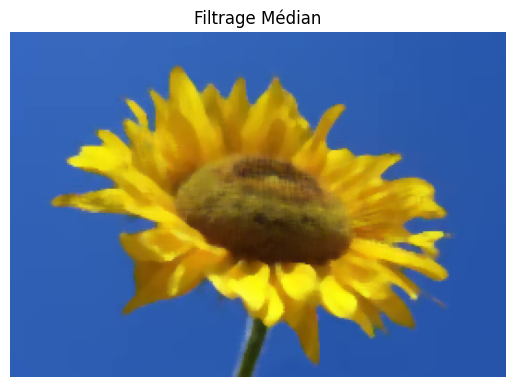

In [ ]:
#Chaque pixel est remplacé par la médiane des pixels voisins.
#Très efficace contre le bruit poivre et sel, conserve mieux les contours que le filtre passe-bas.
filtered_median = cv2.medianBlur(noisy_sp, 5)

plt.imshow(filtered_median)
plt.title("Filtrage Médian")
plt.axis("off")
plt.show()


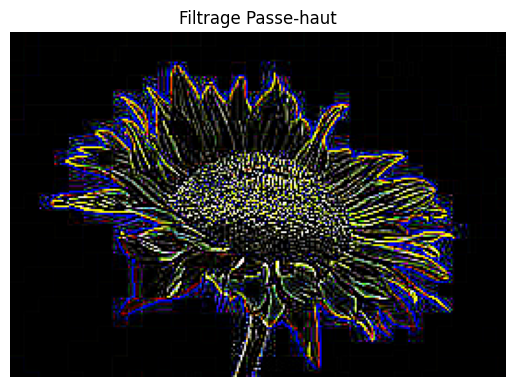

In [ ]:
#Met en évidence les contours en augmentant le contraste des bords, mais peut introduire du bruit.
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

image_high_pass = cv2.filter2D(image, -1, kernel)

plt.imshow(image_high_pass, cmap="gray")
plt.title("Filtrage Passe-haut")
plt.axis("off")
plt.show()


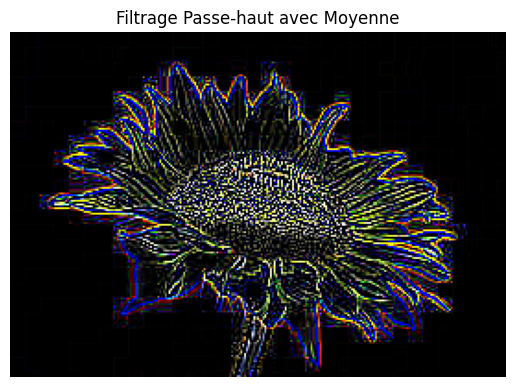

In [ ]:
#soustrait une version floutée de l’image à l’image originale. Ce qui accentue les détails tout en conservant une meilleure transition.
kernel_avg = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

image_high_pass_avg = cv2.filter2D(image, -1, kernel_avg)

plt.imshow(image_high_pass_avg, cmap="gray")
plt.title("Filtrage Passe-haut avec Moyenne")
plt.axis("off")
plt.show()


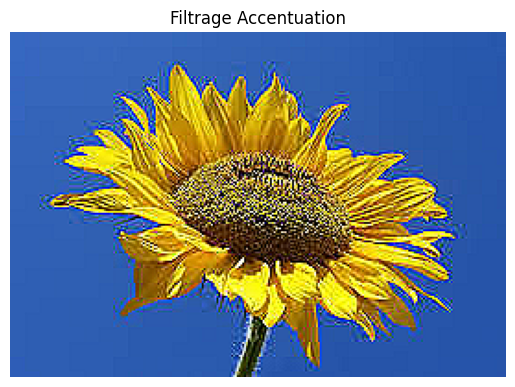

In [ ]:
#On floute l’image puis on soustrait cette version floue à l’image originale. Ce qui améliore la netteté sans trop de bruit.
sharp_kernel = np.array([[0, -1,  0],
                         [-1,  5, -1],
                         [0, -1,  0]])

image_sharpened = cv2.filter2D(image, -1, sharp_kernel)

plt.imshow(image_sharpened)
plt.title("Filtrage Accentuation")
plt.axis("off")
plt.show()


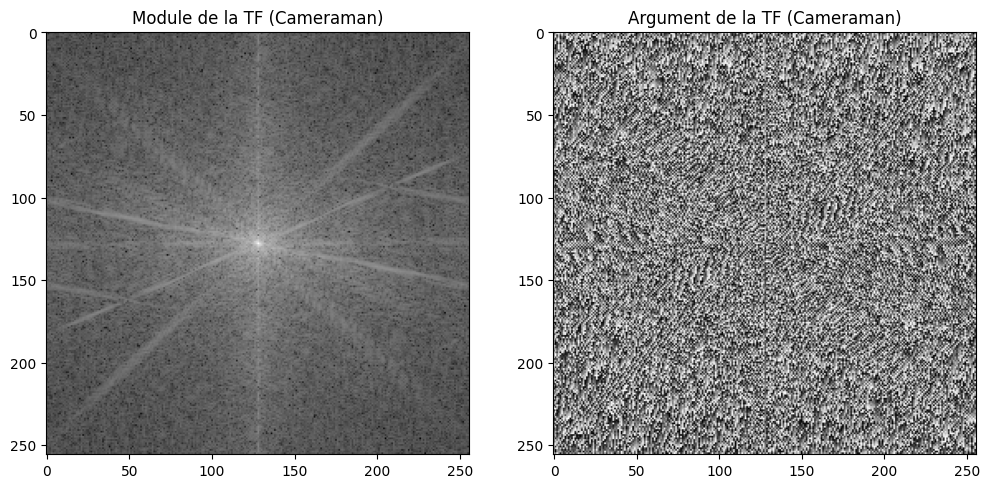

In [ ]:
# L’image du module montre l’intensité des fréquences, celle de l’argument donne les phases. la phase contient l’information spatiale sur la disposition des structures dans l’image.
# Charger l'image cameraman
cameraman = cv2.imread("cameraman.jpg", 0)

# Transformer de Fourier
f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)

# Module et Argument
magnitude = np.abs(fshift)
phase = np.angle(fshift)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + magnitude), cmap="gray")
plt.title("Module de la TF (Cameraman)")

plt.subplot(1, 2, 2)
plt.imshow(phase, cmap="gray")
plt.title("Argument de la TF (Cameraman)")

plt.show()


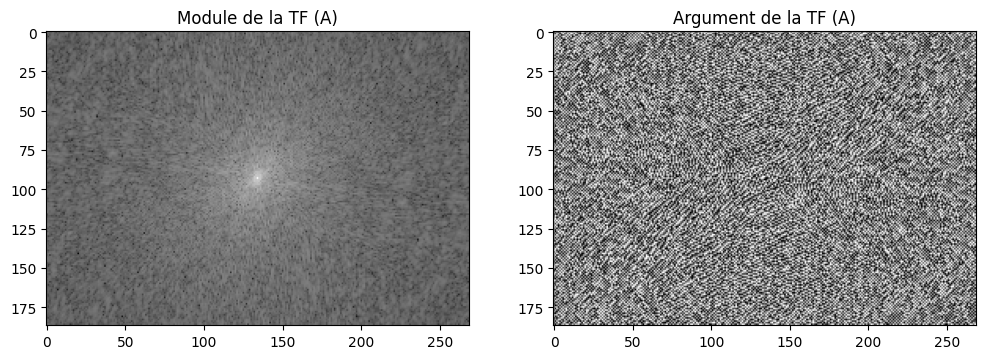

In [ ]:
trui = cv2.imread("image TP2 IMN.jpg", 0)

f_trui = np.fft.fft2(trui)
fshift_trui = np.fft.fftshift(f_trui)

magnitude_trui = np.abs(fshift_trui)
phase_trui = np.angle(fshift_trui)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + magnitude_trui), cmap="gray")
plt.title("Module de la TF (A)")

plt.subplot(1, 2, 2)
plt.imshow(phase_trui, cmap="gray")
plt.title("Argument de la TF (A)")

plt.show()


In [ ]:
# Construire la TF modifiée
new_TF = magnitude * np.exp(1j * phase_trui)

# Inverser la TF
new_image = np.fft.ifft2(np.fft.ifftshift(new_TF))
new_image = np.abs(new_image)

plt.imshow(new_image, cmap="gray")
plt.title("Image avec Module de Cameraman & Argument de Trui")
plt.axis("off")
plt.show()


ValueError: operands could not be broadcast together with shapes (256,256) (187,269) 

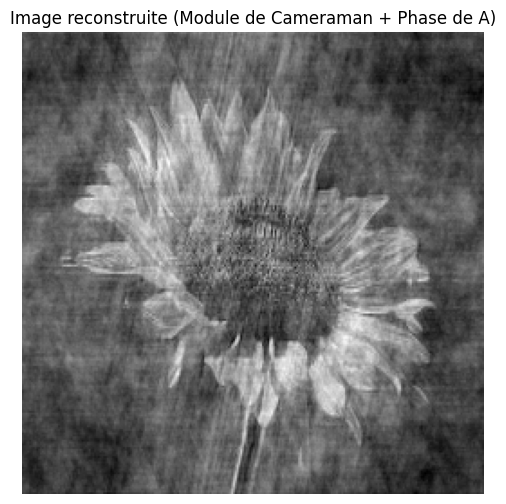

In [ ]:
# Redimensionner l'image Trui à la taille de Cameraman
image_trui_resized = cv2.resize(trui, (256, 256), interpolation=cv2.INTER_CUBIC)

# Calcul de la TF des deux images
f_cameraman = np.fft.fft2(cameraman)
f_trui = np.fft.fft2(image_trui_resized)

# Extraire module et phase
magnitude = np.abs(f_cameraman)  # Module de Cameraman
phase_trui = np.angle(f_trui)  # Phase de Trui

# Construire la nouvelle TF avec le module de Cameraman et la phase de Trui
new_TF = magnitude * np.exp(1j * phase_trui)

# Revenir à l’espace spatial avec la TF inverse
new_image = np.fft.ifft2(new_TF).real

# Affichage du résultat
plt.figure(figsize=(6,6))
plt.imshow(new_image, cmap='gray')
plt.title("Image reconstruite (Module de Cameraman + Phase de A)")
plt.axis('off')
plt.show()